<div class="alert alert-block alert-info">
<h1>Classification : <code>7-classification.ipynb</code></h1>
</div>

---

### The purpose of this notebook is to use different methods to classify samples using machine learning models

---
# Table of contents
- [0 - Import modules](#0---Import-modules)
- [0 - Import useful functions](#0---Import-useful-functions)
- [0 - Import peak table](#0---Import-peak-table)
  - [a - Keep only metadata in the following dataframe](#a---Keep-only-metadata-in-the-following-dataframe)
  - [b - Keep only intensities in the following dataframe](#b---Keep-only-intensities-in-the-following-dataframe)
  - [c - Set target feature](#c---Set-target-feature)
- [1 - Try each model separately](#1---Try-each-model-separately)
  - [a - Ridge classification](#a---Ridge-classification)
  - [b - Logistic regression](#b---Logistic-regression)
  - [c - Linear Discriminant Analysis](#c---Linear-Discriminant-Analysis)
  - [d - SVC](#d---SVC)
  - [e - Stochastic Gradient Descent](#e---Stochastic-Gradient-Descent)
  - [f - Nearest Neighbors Classification](#f---Nearest-Neighbors-Classification)
  - [g - Nearest Centroid Classifier](#g---Nearest-Centroid-Classifier)
  - [h - Gaussian Process Classifier](#h---Gaussian-Process-Classifier)
  - [i - Gaussian Naive Bayes](#i---Gaussian-Naive-Bayes)
  - [j - Decision Trees](#j---Decision-Trees)
  - [k - Random Forest](#k---Random-Forest)
  - [l - Extremely Randomized Trees](#l---Extremely-Randomized-Trees)
  - [m - AdaBoost](#m---AdaBoost)
  - [n - Gradient Tree Boosting](#n---Gradient-Tree-Boosting)
  - [o - Histogram-Based Gradient Boosting](#o---Histogram-Based-Gradient-Boosting)
  - [p - Neural network - Multi-layer Perceptron](#p---Neural-network---Multi-layer-Perceptron)
- [2 - Launch all models using pipeline](#2---Launch-all-models-using-pipeline)
---

### References

- https://www.dataquest.io/blog/learning-curves-machine-learning/
- https://www.scikit-yb.org/en/latest/api/model_selection/learning_curve.html
- https://scikit-learn.org/stable/modules/permutation_importance.html

# 0 - Import modules

In [1]:
import seaborn as sns
import pandas as pd
import os

In [2]:
# Setting working directory
import re
pwd = ! pwd
pwd = re.sub('notebooks/', '', pwd[0])
pwd = '/'.join(pwd.split('/')[:-1]) + '/'
print(f'Working directory : {pwd}')

# Print Python version
python_version = ! python --version
print(f'Python version : {python_version[0]}')

Working directory : /home/jovyan/work/
Python version : Python 3.10.4


In [3]:
# Tune the visual settings for figures in seaborn
sns.set_context(
    "notebook", font_scale=1.2, rc={"axes.titlesize": 15}
)

from matplotlib import rcParams

rcParams["figure.figsize"] = 12, 8

sns.set_theme(style="darkgrid")

# 0 - Import useful functions

In [4]:
# In the bin folder, python scripts containing useful functions can be found.
# Functions for data exploration are located in file classification_functions.py

import sys
sys.path.append(pwd + 'bin/')

from classification_functions import *

# 0 - Import peak table

#### We import peak table reduced in the previous notebook

In [5]:
path_peakTable = pwd + 'data/synthetic_dataset/reduced_peak_tables/'
reduced_peakTables = [file for file in os.listdir(path_peakTable) if file.endswith('.csv')]
print(f'Available reduced peak tables :\n')
reduced_peakTables

Available reduced peak tables :



['intensities-PCA_10components.csv',
 'intensities-PCA_70percent.csv',
 'peakTable-PCA_95percent-UMAP_2components.csv',
 'peakTable-PCA_95percent-UMAP_3components.csv',
 'peakTable-PCA_95percent-tSNE_2components.csv',
 'peakTable-PCA_95percent-tSNE_3components.csv',
 'peakTable-PCA_95percent.csv',
 'peakTable-kBest_20.csv',
 'peakTable-kBest_211.csv',
 'peakTable-kBest_59.csv']

We choose to import peak table reduced with PCA, keeping 95 percent of initial variance.

In [6]:
chosen_peakTable = 'peakTable-kBest_20.csv'
peakTable = pd.read_csv(path_peakTable + chosen_peakTable, sep=',', decimal='.', na_values='NA')
peakTable

,SampleID,Disease,variable_839,variable_940,variable_990,variable_288,variable_334,variable_753,variable_419,variable_696,...,variable_325,variable_370,variable_342,variable_589,variable_959,variable_630,variable_1026,variable_488,variable_697,variable_673
0,CRR_001,CRR,1.028597,-0.708009,-1.489758,0.740920,-2.206960,2.076006,-0.577210,-0.872091,...,-1.548594,-1.062863,0.640007,-0.499950,-2.312351,-0.467749,-0.305985,-1.451228,-0.415810,-1.368663
1,CRR_002,CRR,0.785562,-0.818792,-1.517698,0.209719,-2.172312,1.696065,-0.648723,-0.807527,...,-1.652446,-1.200227,0.609575,-0.519137,-1.748507,-0.459303,-0.746497,-1.484808,-0.249860,-1.388191
2,CRR_003,CRR,2.698615,0.875452,1.048776,2.138515,2.254367,4.014064,0.237310,1.741226,...,2.200822,1.173808,-0.507730,-0.346981,0.383223,0.008595,0.277496,-0.819498,-0.755211,-0.013905
3,CRR_004,CRR,2.717033,0.245573,-0.489406,1.607900,0.885404,4.780398,-0.039742,1.293306,...,1.588433,0.551550,-0.404017,-0.289237,-0.572353,-0.016695,0.419570,-0.297700,-0.656922,-0.283412
4,CRR_005,CRR,-0.760406,-0.119528,-1.116134,1.038412,-0.762113,-0.348003,-0.646346,2.009221,...,4.200680,3.794364,-0.926748,-0.559713,0.820726,-0.473728,0.192990,-0.534843,-0.729109,1.765579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,HCC_296,HCC,-0.464552,-0.824140,0.171813,-0.265181,-0.074269,-0.243061,-0.433061,-0.370126,...,0.297662,-0.156744,-0.808097,-0.563903,-0.716105,-0.472011,-0.508497,-0.116010,-0.339038,0.077004
596,HCC_297,HCC,-0.557192,-0.003245,1.210332,-1.401416,0.802481,-0.337992,-0.642589,1.585746,...,0.686106,0.519504,-0.959011,-0.209155,0.972593,-0.151999,2.383403,-0.955447,-0.366782,-0.301202
597,HCC_298,HCC,-0.750506,-0.313457,0.795222,0.970951,0.998267,-0.363157,-0.294177,0.547612,...,0.911582,0.285506,-0.686979,-0.561727,0.420234,-0.469533,0.425931,-0.224954,-0.480647,0.007603
598,HCC_299,HCC,-0.668498,-0.417094,0.949454,-1.443883,0.190932,-0.063961,-0.617885,-0.356075,...,0.577877,0.374110,-0.855553,-0.555440,-0.484310,-0.459628,-0.400760,-1.282461,-0.300212,-0.831022


Here we stock in variable <code>col_prefix</code> the prefix of the column names, depending on which peak table have been imported above.

In [7]:
col_prefix = re.sub('peakTable-', '', re.sub('.csv', '', chosen_peakTable)).split('-')[-1].split('_')[0]
if col_prefix == 'kBest' : col_prefix = 'variable_'
if col_prefix == 'PCA' : col_prefix = 'PC'
col_prefix

'variable_'

## a - Keep only metadata in the following dataframe

In [8]:
metadata = peakTable.iloc[:, [col_prefix not in col for col in peakTable.columns]]
metadata

,SampleID,Disease
0,CRR_001,CRR
1,CRR_002,CRR
2,CRR_003,CRR
3,CRR_004,CRR
4,CRR_005,CRR
...,...,...
595,HCC_296,HCC
596,HCC_297,HCC
597,HCC_298,HCC
598,HCC_299,HCC


## b - Keep only intensities in the following dataframe

In [9]:
intensities = peakTable.iloc[:, [col_prefix in col for col in peakTable.columns]]
intensities

,variable_839,variable_940,variable_990,variable_288,variable_334,variable_753,variable_419,variable_696,variable_87,variable_786,variable_325,variable_370,variable_342,variable_589,variable_959,variable_630,variable_1026,variable_488,variable_697,variable_673
0,1.028597,-0.708009,-1.489758,0.740920,-2.206960,2.076006,-0.577210,-0.872091,-0.770660,-1.853851,-1.548594,-1.062863,0.640007,-0.499950,-2.312351,-0.467749,-0.305985,-1.451228,-0.415810,-1.368663
1,0.785562,-0.818792,-1.517698,0.209719,-2.172312,1.696065,-0.648723,-0.807527,-0.821795,-1.644972,-1.652446,-1.200227,0.609575,-0.519137,-1.748507,-0.459303,-0.746497,-1.484808,-0.249860,-1.388191
2,2.698615,0.875452,1.048776,2.138515,2.254367,4.014064,0.237310,1.741226,1.501564,0.551956,2.200822,1.173808,-0.507730,-0.346981,0.383223,0.008595,0.277496,-0.819498,-0.755211,-0.013905
3,2.717033,0.245573,-0.489406,1.607900,0.885404,4.780398,-0.039742,1.293306,1.134716,-0.407762,1.588433,0.551550,-0.404017,-0.289237,-0.572353,-0.016695,0.419570,-0.297700,-0.656922,-0.283412
4,-0.760406,-0.119528,-1.116134,1.038412,-0.762113,-0.348003,-0.646346,2.009221,0.066793,-1.239655,4.200680,3.794364,-0.926748,-0.559713,0.820726,-0.473728,0.192990,-0.534843,-0.729109,1.765579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,-0.464552,-0.824140,0.171813,-0.265181,-0.074269,-0.243061,-0.433061,-0.370126,-0.676685,-0.480087,0.297662,-0.156744,-0.808097,-0.563903,-0.716105,-0.472011,-0.508497,-0.116010,-0.339038,0.077004
596,-0.557192,-0.003245,1.210332,-1.401416,0.802481,-0.337992,-0.642589,1.585746,0.891012,1.293242,0.686106,0.519504,-0.959011,-0.209155,0.972593,-0.151999,2.383403,-0.955447,-0.366782,-0.301202
597,-0.750506,-0.313457,0.795222,0.970951,0.998267,-0.363157,-0.294177,0.547612,-0.294147,1.332983,0.911582,0.285506,-0.686979,-0.561727,0.420234,-0.469533,0.425931,-0.224954,-0.480647,0.007603
598,-0.668498,-0.417094,0.949454,-1.443883,0.190932,-0.063961,-0.617885,-0.356075,-0.239786,0.949099,0.577877,0.374110,-0.855553,-0.555440,-0.484310,-0.459628,-0.400760,-1.282461,-0.300212,-0.831022


## c - Set target feature

### Our target here is <code>Disease</code> column in metadata, let's create a variable <code>target</code>

In [10]:
target = metadata['Disease']
target

0      CRR
1      CRR
2      CRR
3      CRR
4      CRR
      ... 
595    HCC
596    HCC
597    HCC
598    HCC
599    HCC
Name: Disease, Length: 600, dtype: object

# 1 - Try each model separately

In this part, each machine learning model can be used separately.

The choice of the __most relevant model to use hugely depends on the inputed data__. Scikit-learn documentation is very helpful ([link](https://scikit-learn.org/stable/supervised_learning.html)). Machine learning models can be adapted for __regression__ (predict a continuous value as output) and/or __classification__ (predict a discrete value as output, binary most of the time).

Some models are linear and some others are non-linear, here is a short answer of differences between both for both regression and classification : ([link](https://stats.stackexchange.com/questions/503717/linear-vs-nonlinear-machine-learning-algorithms)).

Below are proposed different machine learning models for classification but be aware of the following points :
- some models can be non-relevant and give erroneous outcomes depending on the dataset
- models are instantiated with default hyperparameters, tuning these hyperparameters for your dataset would surely be relevant
- models can have a great prediction score but it can be caused by overfitting ([overfitting wikipedia](https://en.wikipedia.org/wiki/Overfitting))
- there is no magical solution, machine learning is complex, results always depends on inputed dataset !

---

For each model below, we run the <code>evaluation</code> function, by giving the intensities dataframe, the target feature and the model as arguments.

As outputs, we have :
- confusion matrix : the true value of the target feature (rows) vs. the predicted value of target, and the number of observations in each cell
- classification report : a few different metrics to access the predictions of the model
- graphs : learning curve (for classification), scalability and performance of the model
- feature importance histogram : using permutation, we access the importance of each feature in the model : high value = important feature

## a - Ridge classification

https://scikit-learn.org/stable/modules/linear_model.html#classification

In [11]:
from sklearn.linear_model import RidgeClassifier

Corresponding classes to labels : {'CRR': 0, 'HCC': 1}

Confusion matrix :


,CRR,HCC
true/pred,,
CRR,41,19
HCC,16,44



Classification report :


,precision,recall,f1-score,support
CRR,0.72,0.68,0.70,60.00
HCC,0.70,0.73,0.72,60.00
accuracy,0.71,0.71,0.71,0.71
macro avg,0.71,0.71,0.71,120.00
weighted avg,0.71,0.71,0.71,120.00


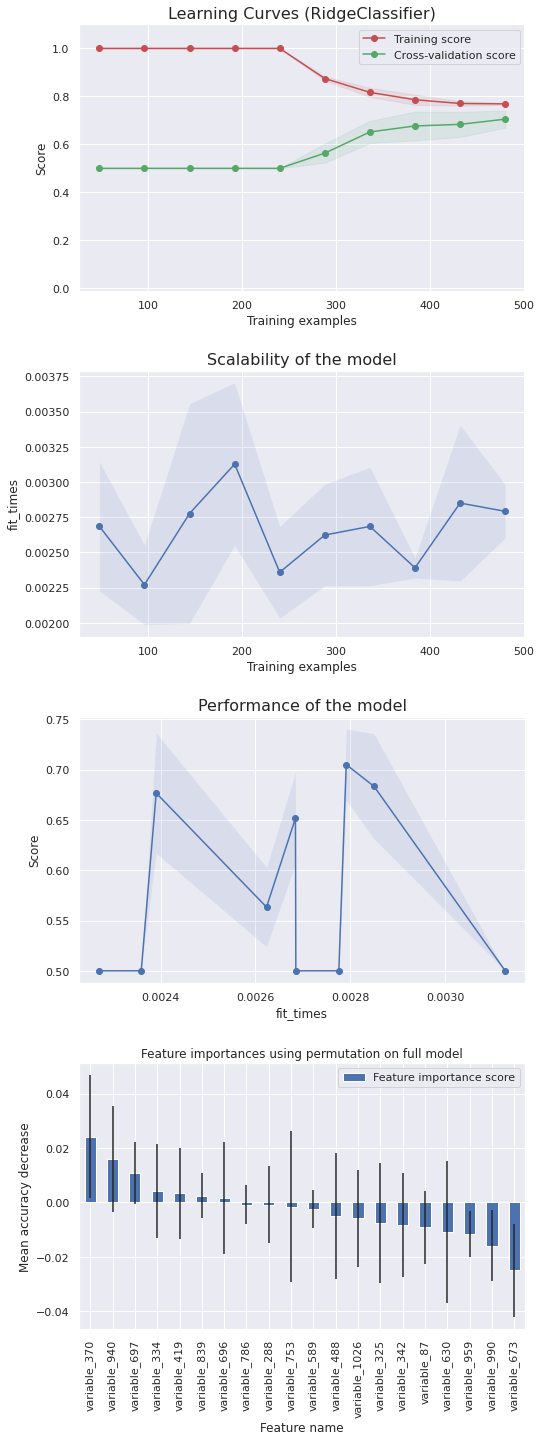

In [12]:
model = RidgeClassifier()

curr_score, df_feature_importance = evaluation(X=intensities, y=target, model=model,
                                               plot_each_model=True, plot_hist_score=True)

## b - Logistic regression

https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

In [13]:
from sklearn.linear_model import LogisticRegression

Corresponding classes to labels : {'CRR': 0, 'HCC': 1}

Confusion matrix :


,CRR,HCC
true/pred,,
CRR,41,19
HCC,15,45



Classification report :


,precision,recall,f1-score,support
CRR,0.73,0.68,0.71,60.00
HCC,0.70,0.75,0.73,60.00
accuracy,0.72,0.72,0.72,0.72
macro avg,0.72,0.72,0.72,120.00
weighted avg,0.72,0.72,0.72,120.00


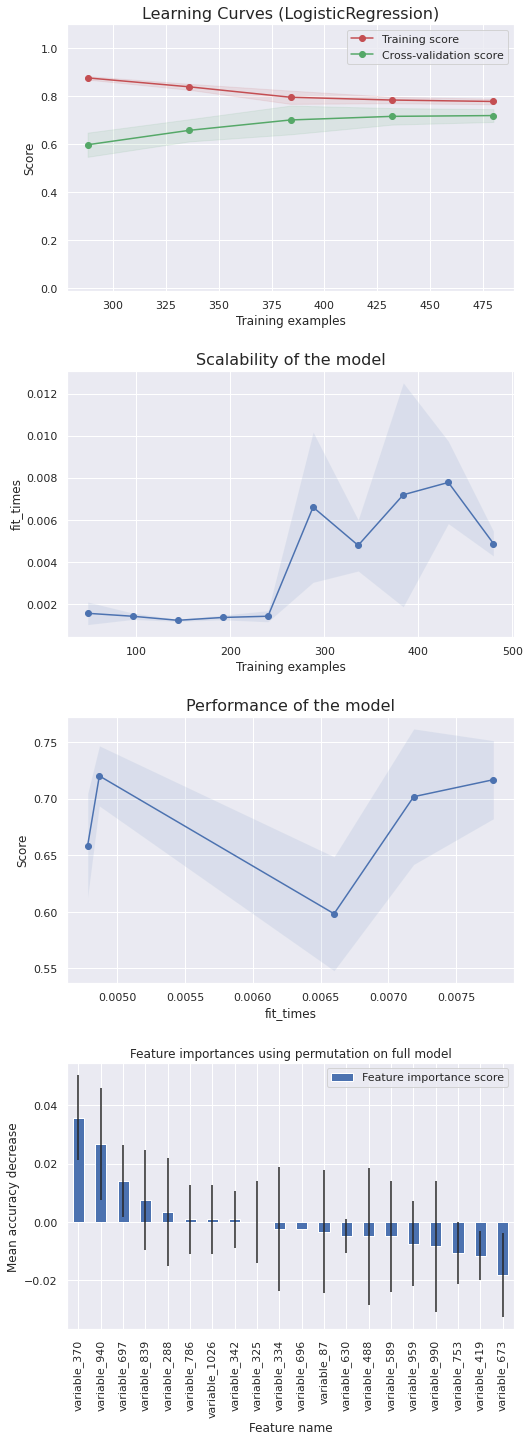

In [14]:
model = LogisticRegression()

curr_score, df_feature_importance = evaluation(X=intensities, y=target, model=model,
                                               plot_each_model=True, plot_hist_score=True)

## c - Linear Discriminant Analysis

https://scikit-learn.org/stable/modules/lda_qda.html#mathematical-formulation-of-the-lda-and-qda-classifiers

In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

Corresponding classes to labels : {'CRR': 0, 'HCC': 1}

Confusion matrix :


,CRR,HCC
true/pred,,
CRR,41,19
HCC,16,44



Classification report :


,precision,recall,f1-score,support
CRR,0.72,0.68,0.70,60.00
HCC,0.70,0.73,0.72,60.00
accuracy,0.71,0.71,0.71,0.71
macro avg,0.71,0.71,0.71,120.00
weighted avg,0.71,0.71,0.71,120.00


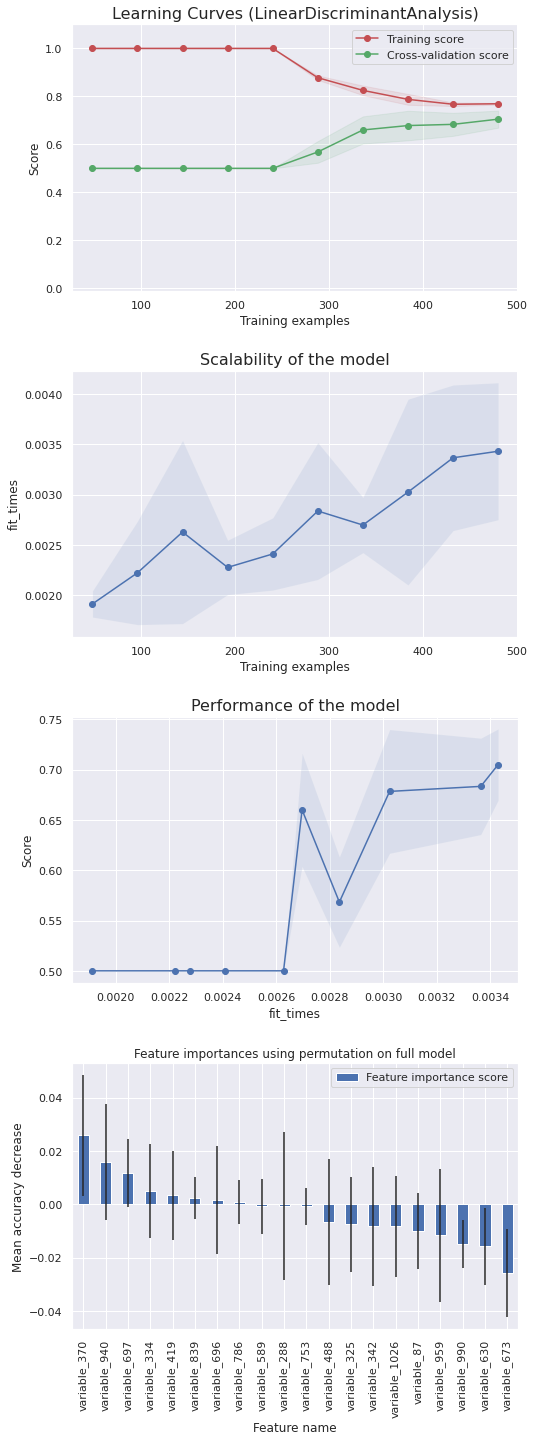

In [16]:
model = LinearDiscriminantAnalysis()

curr_score, df_feature_importance = evaluation(X=intensities, y=target, model=model,
                                               plot_each_model=True, plot_hist_score=True)

## d - SVC

https://scikit-learn.org/stable/modules/svm.html#classification

In [17]:
from sklearn.svm import SVC

Corresponding classes to labels : {'CRR': 0, 'HCC': 1}

Confusion matrix :


,CRR,HCC
true/pred,,
CRR,46,14
HCC,6,54



Classification report :


,precision,recall,f1-score,support
CRR,0.88,0.77,0.82,60.00
HCC,0.79,0.90,0.84,60.00
accuracy,0.83,0.83,0.83,0.83
macro avg,0.84,0.83,0.83,120.00
weighted avg,0.84,0.83,0.83,120.00


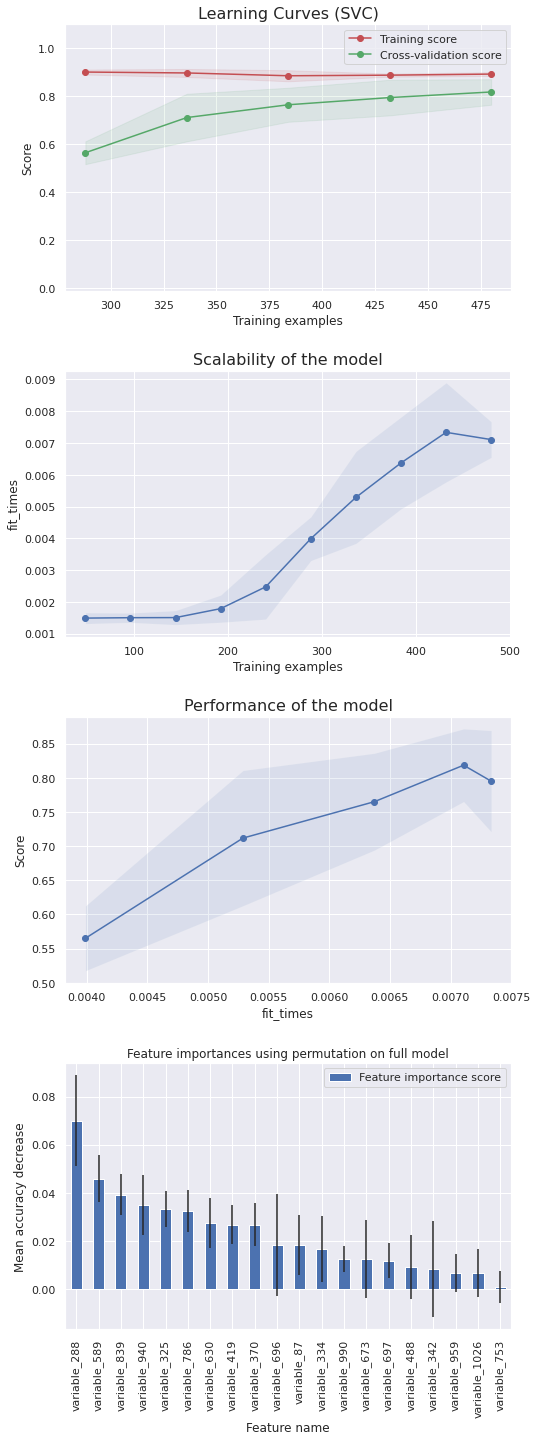

In [18]:
model = SVC(random_state=0)

curr_score, df_feature_importance = evaluation(X=intensities, y=target, model=model,
                                               plot_each_model=True, plot_hist_score=True)

## e - Stochastic Gradient Descent

https://scikit-learn.org/stable/modules/sgd.html#classification

In [19]:
from sklearn.linear_model import SGDClassifier

Corresponding classes to labels : {'CRR': 0, 'HCC': 1}

Confusion matrix :


,CRR,HCC
true/pred,,
CRR,50,10
HCC,32,28



Classification report :


,precision,recall,f1-score,support
CRR,0.61,0.83,0.70,60.00
HCC,0.74,0.47,0.57,60.00
accuracy,0.65,0.65,0.65,0.65
macro avg,0.67,0.65,0.64,120.00
weighted avg,0.67,0.65,0.64,120.00


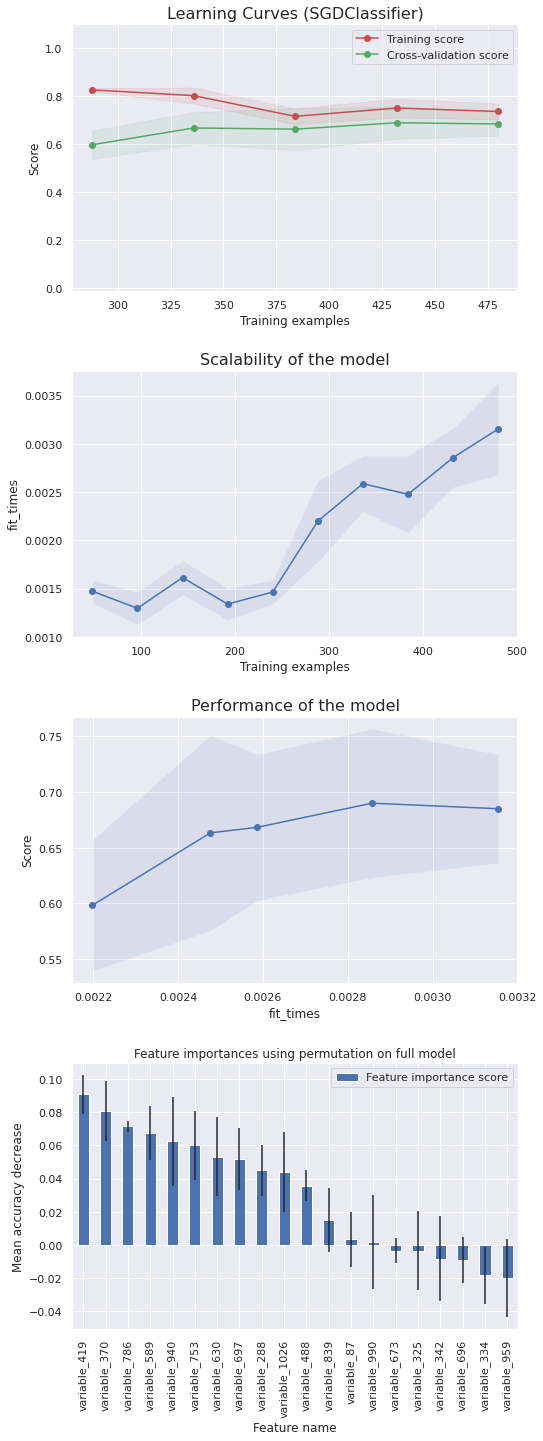

In [20]:
model = SGDClassifier()

curr_score, df_feature_importance = evaluation(X=intensities, y=target, model=model,
                                               plot_each_model=True, plot_hist_score=True)

## f - Nearest Neighbors Classification

https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification

In [21]:
from sklearn.neighbors import KNeighborsClassifier

Corresponding classes to labels : {'CRR': 0, 'HCC': 1}

Confusion matrix :


,CRR,HCC
true/pred,,
CRR,42,18
HCC,9,51



Classification report :


,precision,recall,f1-score,support
CRR,0.82,0.70,0.76,60.00
HCC,0.74,0.85,0.79,60.00
accuracy,0.78,0.78,0.78,0.78
macro avg,0.78,0.77,0.77,120.00
weighted avg,0.78,0.78,0.77,120.00


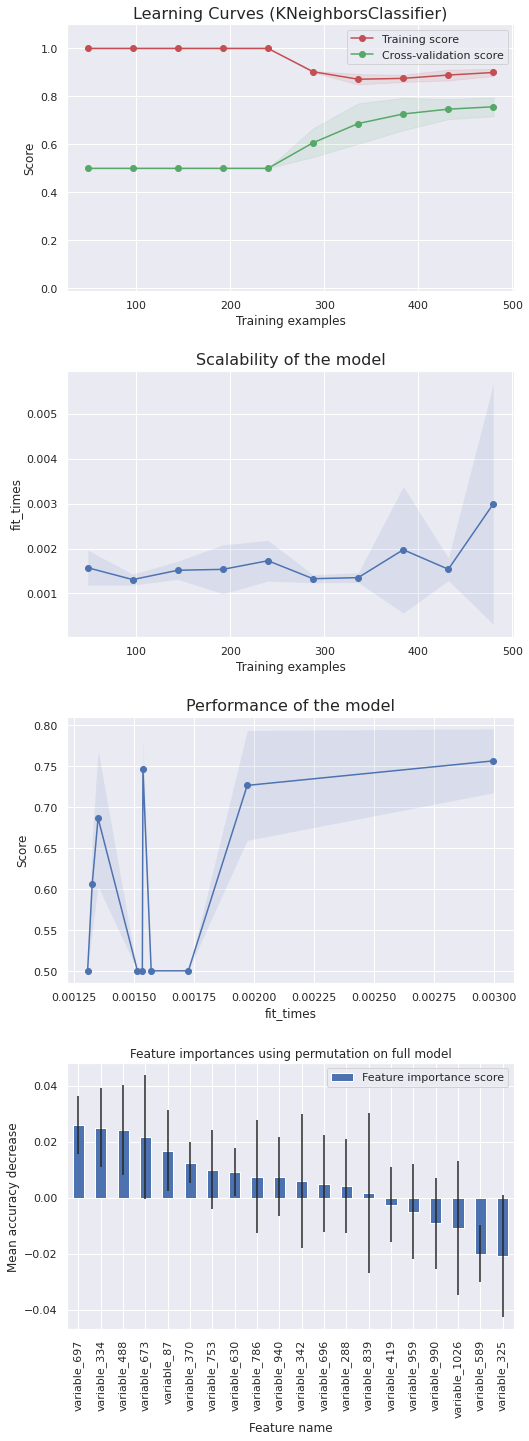

In [22]:
model = KNeighborsClassifier()

curr_score, df_feature_importance = evaluation(X=intensities, y=target, model=model,
                                               plot_each_model=True, plot_hist_score=True)

## g - Nearest Centroid Classifier

In [23]:
from sklearn.neighbors import NearestCentroid

Corresponding classes to labels : {'CRR': 0, 'HCC': 1}

Confusion matrix :


,CRR,HCC
true/pred,,
CRR,42,18
HCC,15,45



Classification report :


,precision,recall,f1-score,support
CRR,0.74,0.70,0.72,60.00
HCC,0.71,0.75,0.73,60.00
accuracy,0.72,0.72,0.72,0.72
macro avg,0.73,0.72,0.72,120.00
weighted avg,0.73,0.72,0.72,120.00


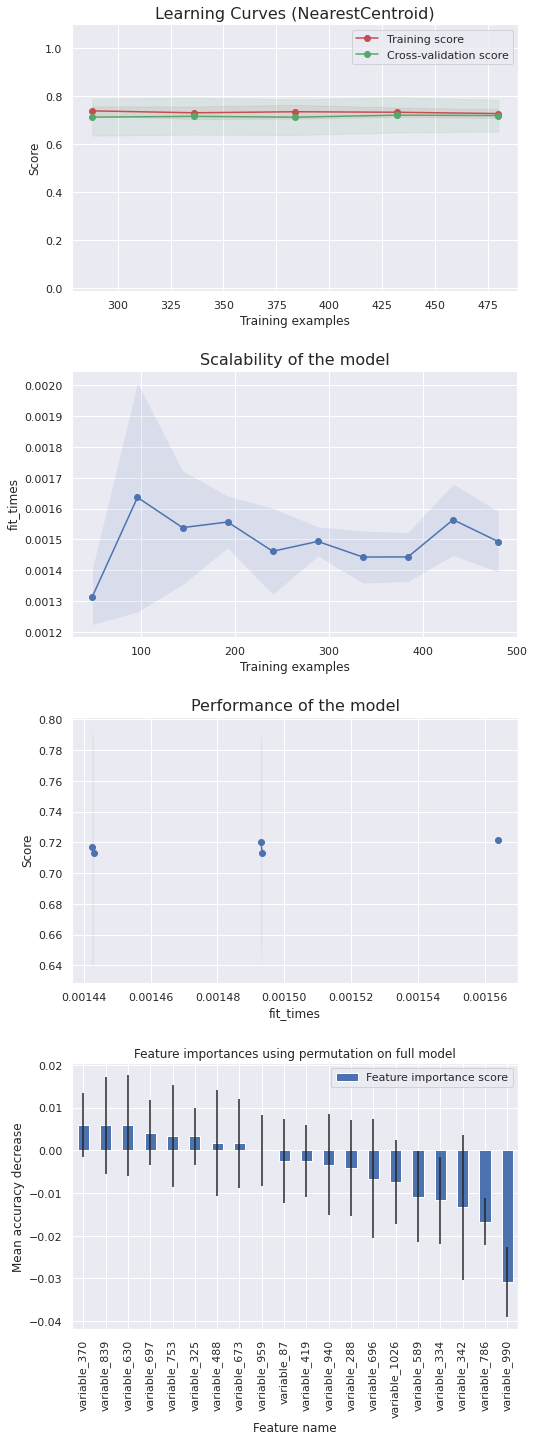

In [24]:
model = NearestCentroid()

curr_score, df_feature_importance = evaluation(X=intensities, y=target, model=model,
                                               plot_each_model=True, plot_hist_score=True)

## h - Gaussian Process Classifier

https://scikit-learn.org/stable/modules/gaussian_process.html#gaussian-process-classification-gpc

In [25]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

Corresponding classes to labels : {'CRR': 0, 'HCC': 1}

Confusion matrix :


,CRR,HCC
true/pred,,
CRR,53,7
HCC,2,58



Classification report :


,precision,recall,f1-score,support
CRR,0.96,0.88,0.92,60.00
HCC,0.89,0.97,0.93,60.00
accuracy,0.93,0.93,0.93,0.93
macro avg,0.93,0.93,0.92,120.00
weighted avg,0.93,0.93,0.92,120.00


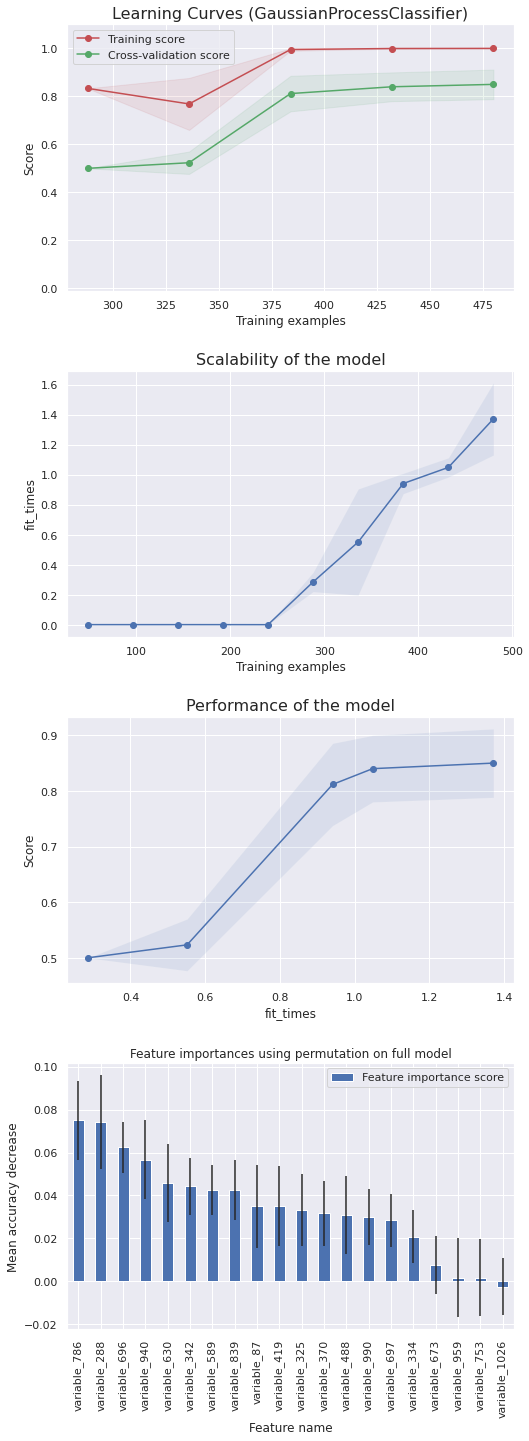

In [26]:
model = GaussianProcessClassifier(kernel=1.0 * RBF(1.0))

curr_score, df_feature_importance = evaluation(X=intensities, y=target, model=model,
                                               plot_each_model=True, plot_hist_score=True)

## i - Gaussian Naive Bayes

In [27]:
from sklearn.naive_bayes import GaussianNB

Corresponding classes to labels : {'CRR': 0, 'HCC': 1}

Confusion matrix :


,CRR,HCC
true/pred,,
CRR,34,26
HCC,11,49



Classification report :


,precision,recall,f1-score,support
CRR,0.76,0.57,0.65,60.00
HCC,0.65,0.82,0.73,60.00
accuracy,0.69,0.69,0.69,0.69
macro avg,0.70,0.69,0.69,120.00
weighted avg,0.70,0.69,0.69,120.00


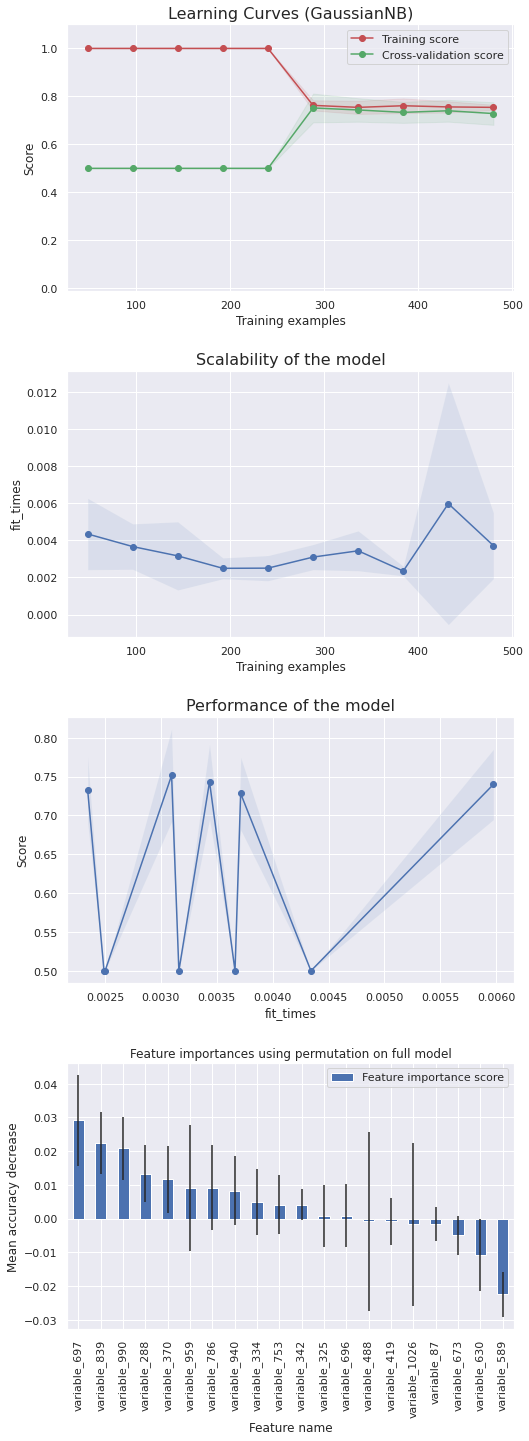

In [28]:
model = GaussianNB()

curr_score, df_feature_importance = evaluation(X=intensities, y=target, model=model,
                                               plot_each_model=True, plot_hist_score=True)

## j - Decision Trees

https://scikit-learn.org/stable/modules/tree.html#classification

In [29]:
from sklearn.tree import DecisionTreeClassifier

Corresponding classes to labels : {'CRR': 0, 'HCC': 1}

Confusion matrix :


,CRR,HCC
true/pred,,
CRR,50,10
HCC,3,57



Classification report :


,precision,recall,f1-score,support
CRR,0.94,0.83,0.88,60.00
HCC,0.85,0.95,0.90,60.00
accuracy,0.89,0.89,0.89,0.89
macro avg,0.90,0.89,0.89,120.00
weighted avg,0.90,0.89,0.89,120.00


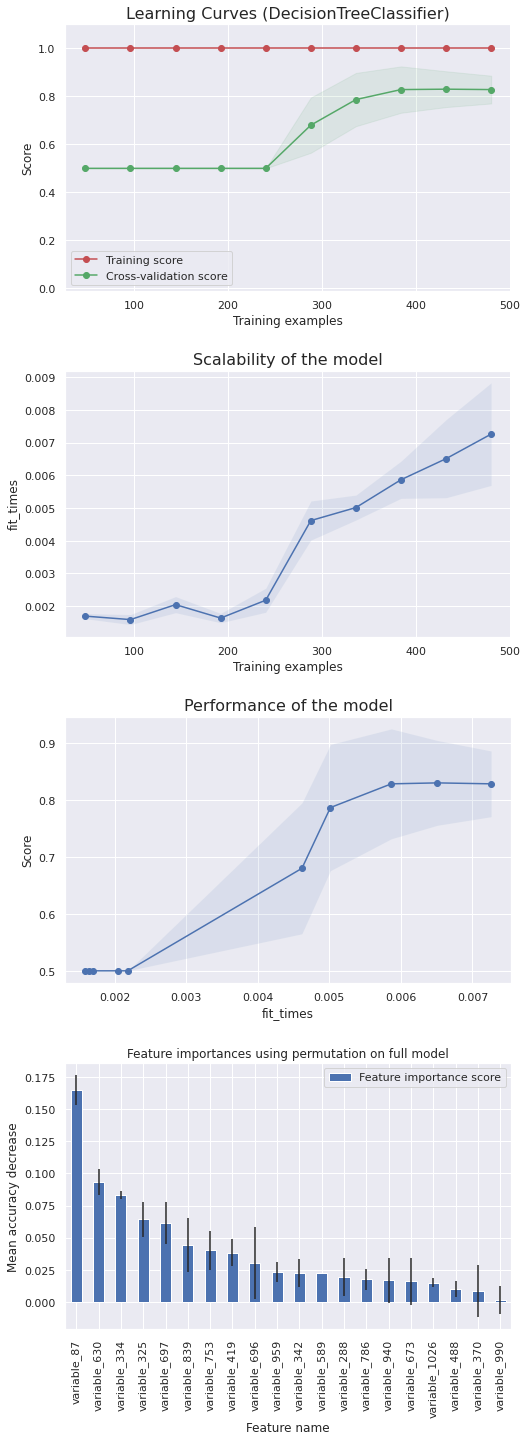

In [30]:
model = DecisionTreeClassifier(random_state=0)

curr_score, df_feature_importance = evaluation(X=intensities, y=target, model=model,
                                               plot_each_model=True, plot_hist_score=True)

## k - Random Forest

https://scikit-learn.org/stable/modules/ensemble.html#random-forests

In [31]:
from sklearn.ensemble import RandomForestClassifier

Corresponding classes to labels : {'CRR': 0, 'HCC': 1}

Confusion matrix :


,CRR,HCC
true/pred,,
CRR,53,7
HCC,5,55



Classification report :


,precision,recall,f1-score,support
CRR,0.91,0.88,0.90,60.00
HCC,0.89,0.92,0.90,60.00
accuracy,0.90,0.90,0.90,0.90
macro avg,0.90,0.90,0.90,120.00
weighted avg,0.90,0.90,0.90,120.00


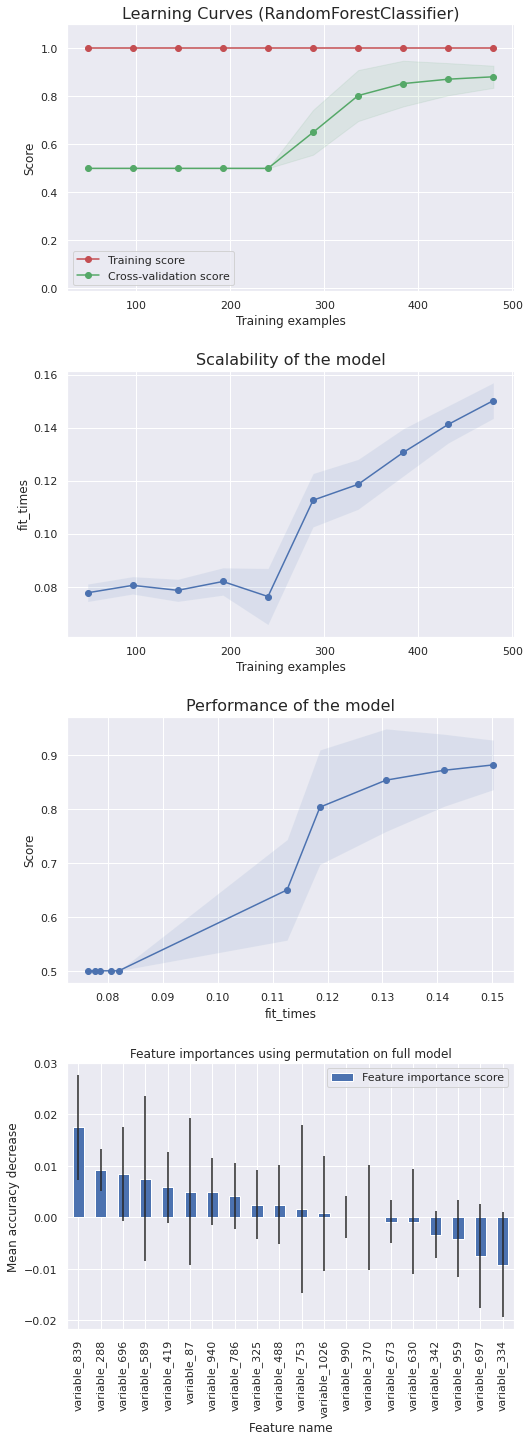

In [32]:
model = RandomForestClassifier(random_state=0)

curr_score, df_feature_importance = evaluation(X=intensities, y=target, model=model,
                                               plot_each_model=True, plot_hist_score=True)

## l - Extremely Randomized Trees

https://scikit-learn.org/stable/modules/ensemble.html#extremely-randomized-trees

In [33]:
from sklearn.ensemble import ExtraTreesClassifier

Corresponding classes to labels : {'CRR': 0, 'HCC': 1}

Confusion matrix :


,CRR,HCC
true/pred,,
CRR,57,3
HCC,2,58



Classification report :


,precision,recall,f1-score,support
CRR,0.97,0.95,0.96,60.00
HCC,0.95,0.97,0.96,60.00
accuracy,0.96,0.96,0.96,0.96
macro avg,0.96,0.96,0.96,120.00
weighted avg,0.96,0.96,0.96,120.00


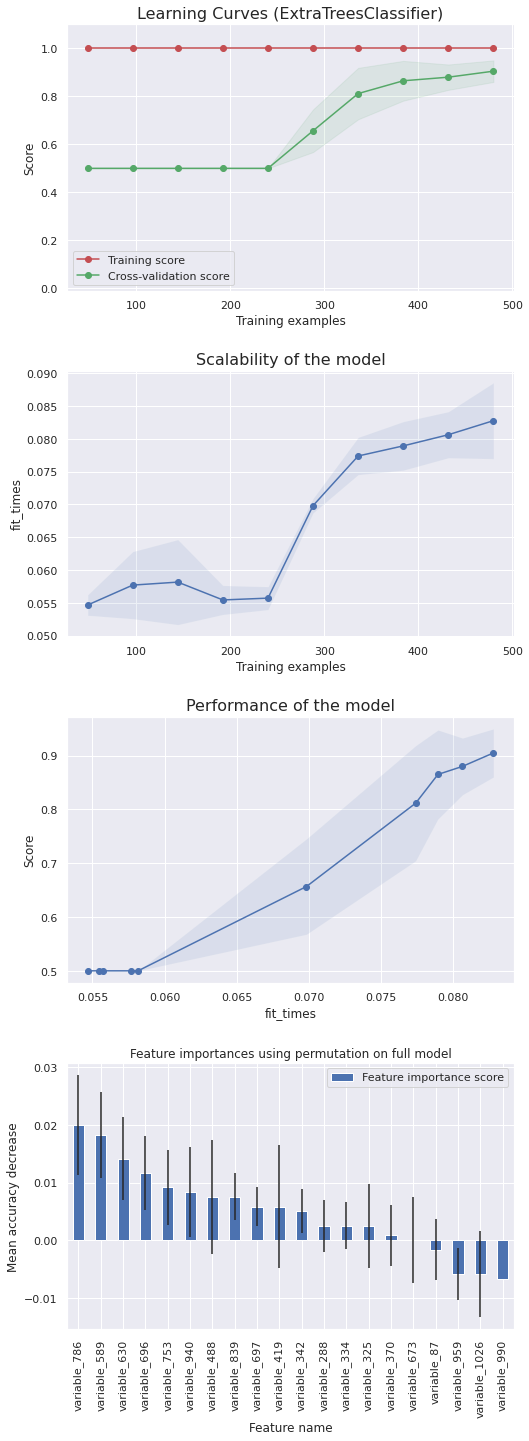

In [34]:
model = ExtraTreesClassifier(random_state=0)

curr_score, df_feature_importance = evaluation(X=intensities, y=target, model=model,
                                               plot_each_model=True, plot_hist_score=True)

## m - AdaBoost

https://scikit-learn.org/stable/modules/ensemble.html#adaboost

In [35]:
from sklearn.ensemble import AdaBoostClassifier

Corresponding classes to labels : {'CRR': 0, 'HCC': 1}

Confusion matrix :


,CRR,HCC
true/pred,,
CRR,43,17
HCC,8,52



Classification report :


,precision,recall,f1-score,support
CRR,0.84,0.72,0.77,60.00
HCC,0.75,0.87,0.81,60.00
accuracy,0.79,0.79,0.79,0.79
macro avg,0.80,0.79,0.79,120.00
weighted avg,0.80,0.79,0.79,120.00


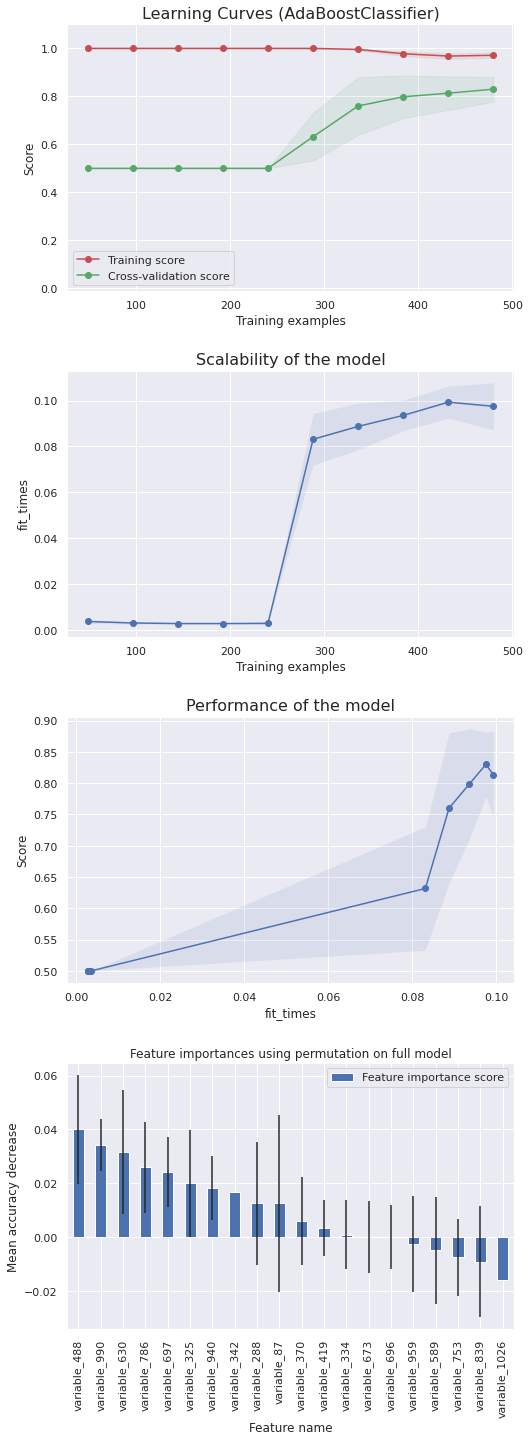

In [36]:
model = AdaBoostClassifier(random_state=0)

curr_score, df_feature_importance = evaluation(X=intensities, y=target, model=model,
                                               plot_each_model=True, plot_hist_score=True)

## n - Gradient Tree Boosting

https://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting

In [37]:
from sklearn.ensemble import GradientBoostingClassifier

Corresponding classes to labels : {'CRR': 0, 'HCC': 1}

Confusion matrix :


,CRR,HCC
true/pred,,
CRR,52,8
HCC,6,54



Classification report :


,precision,recall,f1-score,support
CRR,0.90,0.87,0.88,60.00
HCC,0.87,0.90,0.89,60.00
accuracy,0.88,0.88,0.88,0.88
macro avg,0.88,0.88,0.88,120.00
weighted avg,0.88,0.88,0.88,120.00


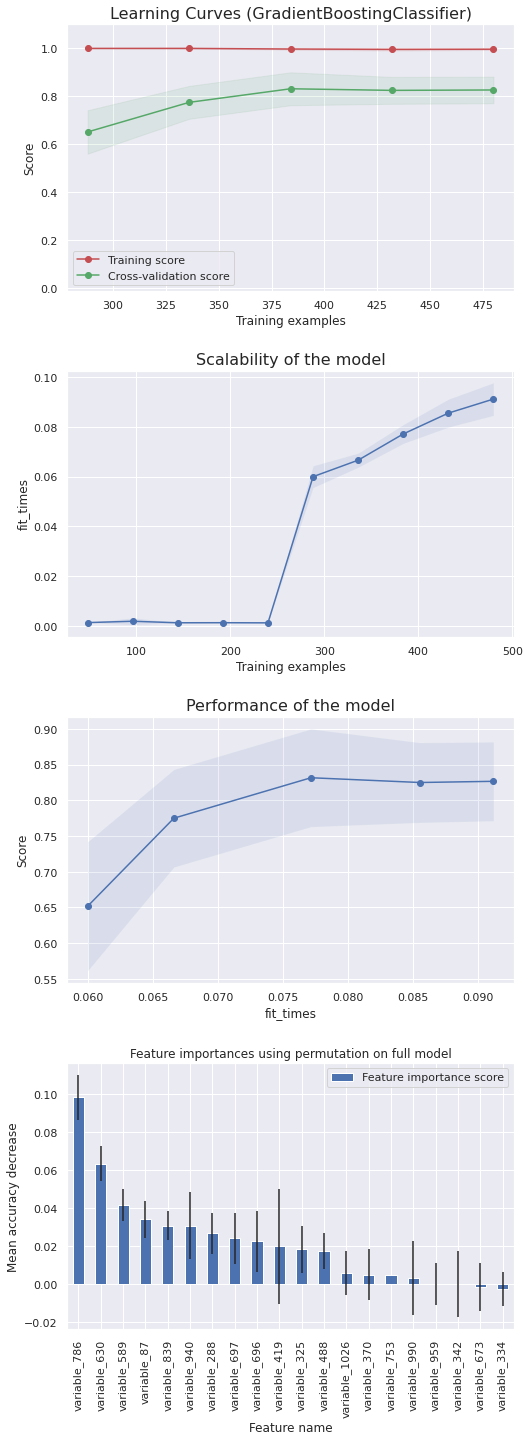

In [38]:
model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

curr_score, df_feature_importance = evaluation(X=intensities, y=target, model=model,
                                               plot_each_model=True, plot_hist_score=True)

## o - Histogram-Based Gradient Boosting

https://scikit-learn.org/stable/modules/ensemble.html#histogram-based-gradient-boosting

In [39]:
from sklearn.ensemble import HistGradientBoostingClassifier

Corresponding classes to labels : {'CRR': 0, 'HCC': 1}

Confusion matrix :


,CRR,HCC
true/pred,,
CRR,56,4
HCC,1,59



Classification report :


,precision,recall,f1-score,support
CRR,0.98,0.93,0.96,60.00
HCC,0.94,0.98,0.96,60.00
accuracy,0.96,0.96,0.96,0.96
macro avg,0.96,0.96,0.96,120.00
weighted avg,0.96,0.96,0.96,120.00


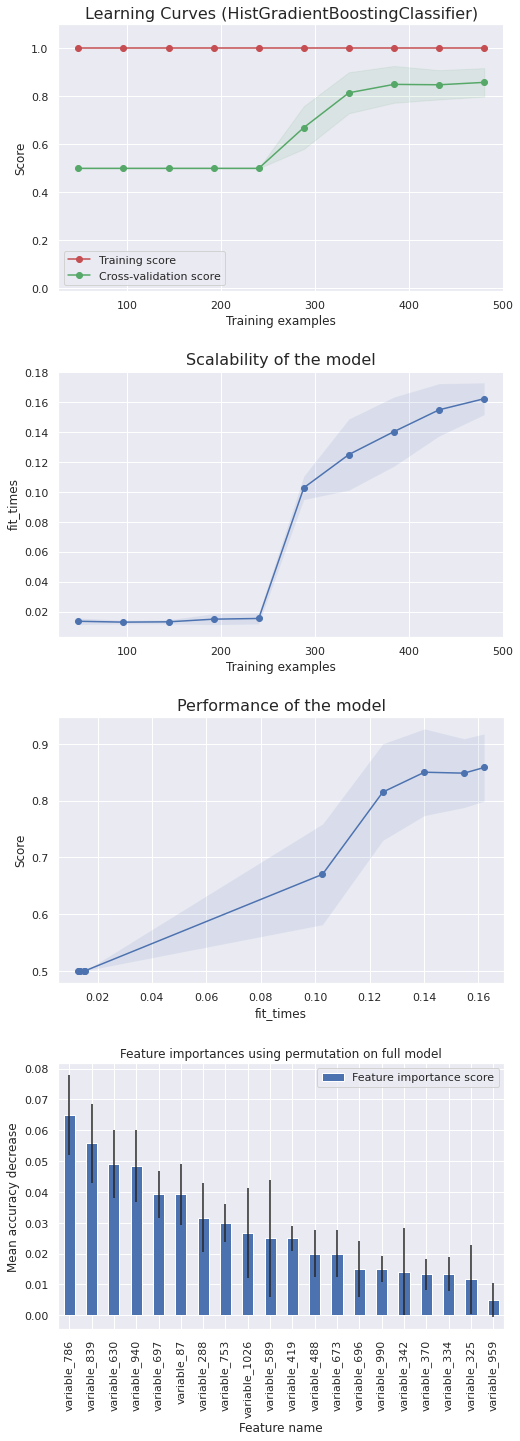

In [40]:
model = HistGradientBoostingClassifier(max_iter=100)

curr_score, df_feature_importance = evaluation(X=intensities, y=target, model=model,
                                               plot_each_model=True, plot_hist_score=True)

## p - Neural network - Multi-layer Perceptron

In [41]:
from sklearn.neural_network import MLPClassifier

Corresponding classes to labels : {'CRR': 0, 'HCC': 1}

Confusion matrix :


,CRR,HCC
true/pred,,
CRR,49,11
HCC,16,44



Classification report :


,precision,recall,f1-score,support
CRR,0.75,0.82,0.78,60.00
HCC,0.80,0.73,0.77,60.00
accuracy,0.78,0.78,0.78,0.78
macro avg,0.78,0.77,0.77,120.00
weighted avg,0.78,0.78,0.77,120.00


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


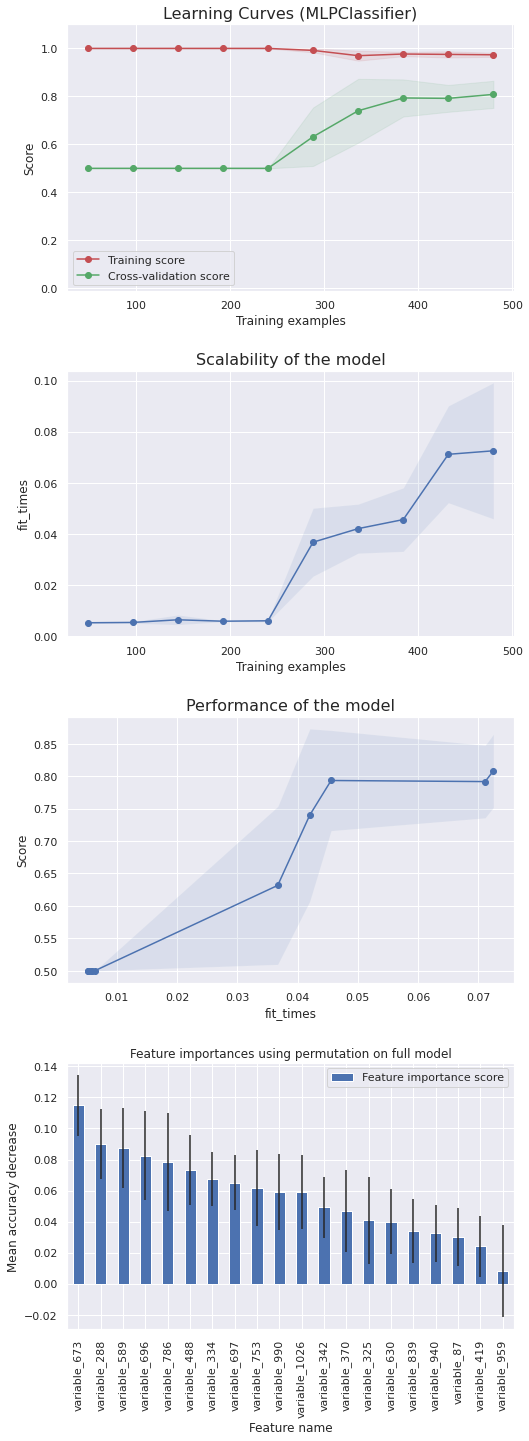

In [42]:
model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), max_iter=300, random_state=1)

curr_score, df_feature_importance = evaluation(X=intensities, y=target, model=model,
                                               plot_each_model=True, plot_hist_score=True)

## (TODO) - Bagging meta-estimator

https://scikit-learn.org/stable/modules/ensemble.html#bagging-meta-estimator

## (TODO) - Voting Classifier

https://scikit-learn.org/stable/modules/ensemble.html#voting-classifier

# 2 - Launch all models using pipeline

###################################################################################################################################################### 



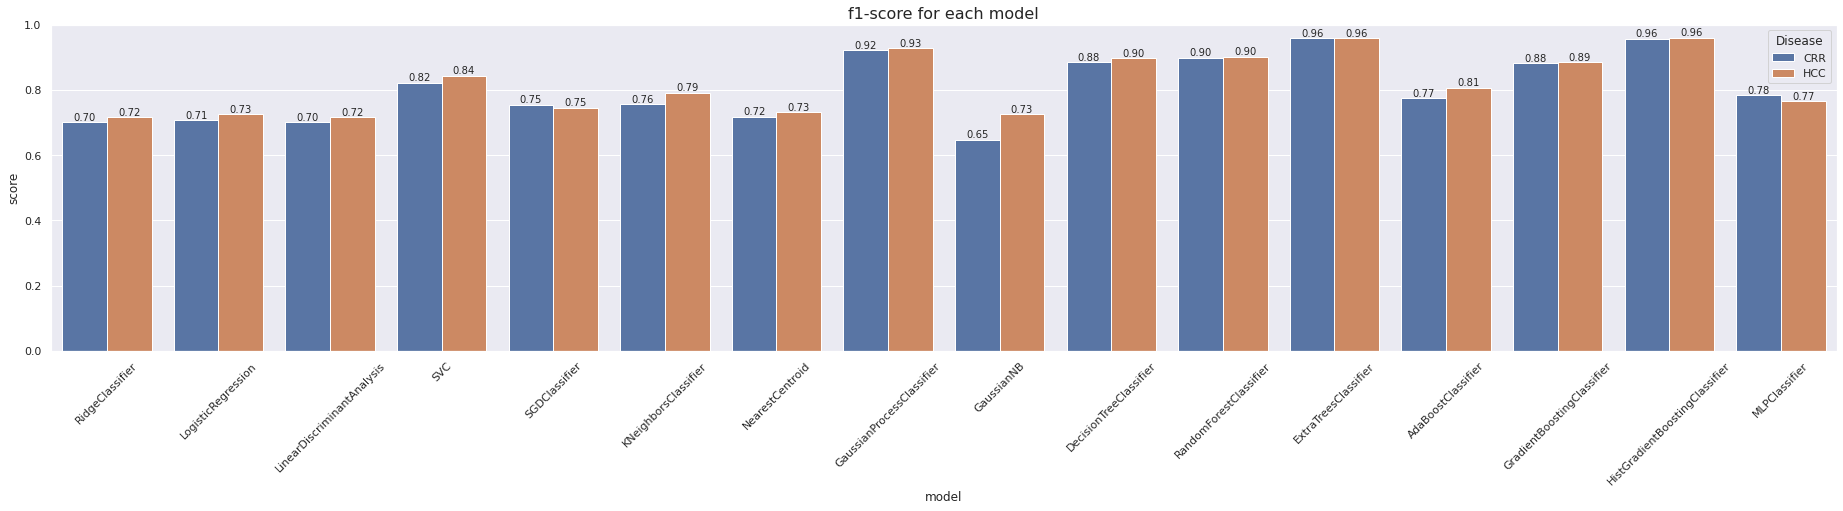


 ######################################################################################################################################################

Time to compute : 00h00m12s

 ######################################################################################################################################################






In [43]:
# Initialise models
RidgeClassifier_ = RidgeClassifier()
LogisticRegression_ = LogisticRegression()
LinearDiscriminantAnalysis_ = LinearDiscriminantAnalysis()
SVC_ = SVC(random_state=0)
SGDClassifier_ = SGDClassifier()
KNeighborsClassifier_ = KNeighborsClassifier()
NearestCentroid_ = NearestCentroid()
GaussianProcessClassifier_ = GaussianProcessClassifier(kernel=1.0 * RBF(1.0))
GaussianNB_ = GaussianNB()
DecisionTreeClassifier_ = DecisionTreeClassifier(random_state=0)
RandomForestClassifier_ = RandomForestClassifier(random_state=0)
ExtraTreesClassifier_ = ExtraTreesClassifier(random_state=0)
AdaBoostClassifier_ = AdaBoostClassifier(random_state=0)
GradientBoostingClassifier_ = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1,
                                                         random_state=0)
HistGradientBoostingClassifier_ = HistGradientBoostingClassifier(max_iter=100)
MLPClassifier_ = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), max_iter=300, random_state=1)


# Create dict with all models
dict_models = {'RidgeClassifier': RidgeClassifier_,
               'LogisticRegression': LogisticRegression_,
               'LinearDiscriminantAnalysis': LinearDiscriminantAnalysis_,
               'SVC': SVC_,
               'SGDClassifier': SGDClassifier_,
               'KNeighborsClassifier': KNeighborsClassifier_,
               'NearestCentroid': NearestCentroid_,
               'GaussianProcessClassifier': GaussianProcessClassifier_,
               'GaussianNB': GaussianNB_,
               'DecisionTreeClassifier': DecisionTreeClassifier_,
               'RandomForestClassifier': RandomForestClassifier_,
               'ExtraTreesClassifier': ExtraTreesClassifier_,
               'AdaBoostClassifier': AdaBoostClassifier_,
               'GradientBoostingClassifier': GradientBoostingClassifier_,
               'HistGradientBoostingClassifier': HistGradientBoostingClassifier_,
               'MLPClassifier': MLPClassifier_
              }


# Launch classification pipeline
df_scores, dict_df_feature_importance = pipeline_classification(X=intensities, y=target, dict_models=dict_models,
                                                                plot_each_model=False, plot_hist_score=True, score='f1-score')